In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import fisher_exact, chi2_contingency

In [6]:
path_to_file = r'C:\Users\ali_m\Downloads\combined religion vs speciality (1).xlsx'

df_GMC = pd.read_excel(path_to_file, sheet_name = 'GMC data', usecols="A:J", nrows=14, index_col=0)  # non-indexed
df_HEE = pd.read_excel(path_to_file, sheet_name = 'HEE data combined', usecols="A:J", nrows=14, index_col=0)  # non-indexed


In [7]:
# print(chi2_contingency__version__)

In [11]:
df_GMC.dropna(axis='rows', how='all')
df_GMC.dropna(axis='columns', how='all')
df_GMC.sum().sum() # GMC

143081

In [12]:
df_HEE.dropna(axis='rows', how='all')
df_HEE.dropna(axis='columns', how='all')
df_HEE.sum().sum() # HEE

18222

# option 1

In [8]:


df = df_GMC
# df = df_HEE

In [9]:
df.dropna(axis='rows', how='all')
df.dropna(axis='columns', how='all')
df.head()

,Atheism,buddhist,christian,hindu,muslim,jewish,sikh,other,unknown and prefer not to say
anaesthesia,1278,45,1537,486,197,31,25,38,6850
Emergency Medicine,369,10,449,96,102,11,7,6,1358
GP,5225,174,7632,1364,1789,175,282,187,46649
Medicine,2116,141,3350,845,856,121,58,93,13745
Obs&gyne,334,19,806,292,190,12,11,16,2390


# Table 1 in manuscript:

In [13]:


table1 = pd.DataFrame(np.array([
    ['England and Wales (2018)', 42.1, 46.7, 0.5, 1.8, 0.5, 5.7, 0.7, 1.7],
    ['UK doctors (2019)', 19.1, 34.4, 0.5, 2.2, 0.2, 3.7, 1.0, 39.1],
                        ]),
             columns=['stats for', 'Atheist', 'Christian', 'Buddhist', 'Hindu',
                     'Jewish', 'Muslim', 'Sikh', 'Any other religion/unknown'],
#              index=[ ],
            )


table1


,stats for,Atheist,Christian,Buddhist,Hindu,Jewish,Muslim,Sikh,Any other religion/unknown
0,England and Wales (2018),42.1,46.7,0.5,1.8,0.5,5.7,0.7,1.7
1,UK doctors (2019),19.1,34.4,0.5,2.2,0.2,3.7,1.0,39.1


In [14]:
# UK Consultants GMC 2019:

GMC_total = df.sum().sum()
df.sum()/GMC_total

Atheism                          0.092367
buddhist                         0.004138
christian                        0.142800
hindu                            0.035330
muslim                           0.032408
jewish                           0.003823
sikh                             0.003641
other                            0.004012
unknown and prefer not to say    0.681481
dtype: float64

In [15]:
_GMC_specialist_percentages = np.array([
    0.092367, 0.142800, 0.004138, 0.035330, 0.003823, 0.032408, 0.003641, 0.681481+0.004012]) * 100

table1.loc[2, 'stats for'] = 'GMC Specialist Register (2019)'
table1.iloc[2, 1:] = _GMC_specialist_percentages

In [16]:
table1

,stats for,Atheist,Christian,Buddhist,Hindu,Jewish,Muslim,Sikh,Any other religion/unknown
0,England and Wales (2018),42.1,46.7,0.5,1.8,0.5,5.7,0.7,1.7
1,UK doctors (2019),19.1,34.4,0.5,2.2,0.2,3.7,1.0,39.1
2,GMC Specialist Register (2019),9.2367,14.28,0.4138,3.533,0.3823,3.2408,0.3641,68.5493


# OPTION 2: can skip. DOES NOT EXCLUDE DATA. MERGES A PROPORTION OF unkowns to RELIGIONS by specialty 

In [17]:
# GMC data included 45,574 doctors from a total of 143081

GMC_total = 143081
GMC_unknown = GMC_total - 45574
GMC_unknown_proportion = GMC_unknown / GMC_total  # 0.652

# find the proportions of data to move from unknown to the religious affiliations. 
table1 = table1.drop(columns='stats for').astype('float')
unknown_to_atheist = table1.loc[1, 'Atheist'] - table1.loc[2, 'Atheist']
unknown_to_christian = table1.loc[1, 'Christian'] - table1.loc[2, 'Christian']
unknown_to_jewish = table1.loc[1, 'Buddhist'] - table1.loc[2, 'Buddhist']
unknown_to_muslim = table1.loc[1, 'Muslim'] - table1.loc[2, 'Muslim']
unknown_to_sikh = table1.loc[1, 'Sikh'] - table1.loc[2, 'Sikh']

In [18]:
unknown_to_atheist + unknown_to_christian+ unknown_to_jewish + unknown_to_muslim + unknown_to_sikh

31.1646

In [19]:
df

,Atheism,buddhist,christian,hindu,muslim,jewish,sikh,other,unknown and prefer not to say
anaesthesia,1278,45,1537,486,197,31,25,38,6850
Emergency Medicine,369,10,449,96,102,11,7,6,1358
GP,5225,174,7632,1364,1789,175,282,187,46649
Medicine,2116,141,3350,845,856,121,58,93,13745
Obs&gyne,334,19,806,292,190,12,11,16,2390
occupational medicine,68,0,120,9,8,2,0,1,359
opthalmology,181,14,404,105,100,9,8,12,1508
paediatrics,585,38,1120,446,204,35,9,34,3521
pathology,314,21,403,120,87,16,7,10,2035
psychiatry,936,51,1074,426,301,56,37,63,5264


In [20]:
# now distribute this extra data per religion, by existing specialty proportions.
# this assumed null hypothesis of no signfiicant difference between general UK doctors and specialist register


In [21]:



def alter_df(df, rel_to_alter, *unknown_to_rel):
    for rel in rel_to_alter:
        for specialty in df[rel].index:
            
            proportion_rel_spec = (df.loc[specialty, rel])/(df[rel].sum())
            index = rel_to_alter.index(rel)
#             print(index)
#             print(unknown_to_rel[index])
            
            # remove
            df.loc[specialty, 'unknown and prefer not to say'] = (
                df.loc[specialty, 'unknown and prefer not to say'] - ((unknown_to_rel[index]) * proportion_rel_spec
                                                                     * df.loc[specialty, 'unknown and prefer not to say'])
            )
            # add
            df_altered.loc[specialty, rel] = df.loc[specialty, rel] + ((unknown_to_rel[index]) * proportion_rel_spec
                                                                      * df.loc[specialty, 'unknown and prefer not to say'])
    
    return df_altered.astype(int)
        

In [22]:
import copy
df_altered = copy.deepcopy(df)

rel_to_alter = ['Atheism', 'christian', 'buddhist', 'muslim', 'sikh']

df_altered = (
    alter_df(df_altered,
             rel_to_alter, 
             unknown_to_atheist/100, unknown_to_christian/100, unknown_to_jewish/100, unknown_to_muslim/100, 
             unknown_to_sikh/100,
            )
)

In [23]:
df_altered

,Atheism,buddhist,christian,hindu,muslim,jewish,sikh,other,unknown and prefer not to say
anaesthesia,1342,45,1638,486,198,31,27,38,6678
Emergency Medicine,372,10,454,96,102,11,7,6,1348
GP,6964,184,10733,1364,1862,175,423,187,41261
Medicine,2304,143,3725,845,866,121,65,93,13146
Obs&gyne,339,19,821,292,190,12,11,16,2367
occupational medicine,68,0,120,9,8,2,0,1,358
opthalmology,182,14,409,105,100,9,8,12,1500
paediatrics,598,38,1152,446,204,35,9,34,3473
pathology,318,21,409,120,87,16,7,10,2023
psychiatry,967,51,1120,426,302,56,38,63,5181


In [24]:
df_altered - df

,Atheism,buddhist,christian,hindu,muslim,jewish,sikh,other,unknown and prefer not to say
anaesthesia,64,0,101,0,1,0,2,0,-172
Emergency Medicine,3,0,5,0,0,0,0,0,-10
GP,1739,10,3101,0,73,0,141,0,-5388
Medicine,188,2,375,0,10,0,7,0,-599
Obs&gyne,5,0,15,0,0,0,0,0,-23
occupational medicine,0,0,0,0,0,0,0,0,-1
opthalmology,1,0,5,0,0,0,0,0,-8
paediatrics,13,0,32,0,0,0,0,0,-48
pathology,4,0,6,0,0,0,0,0,-12
psychiatry,31,0,46,0,1,0,1,0,-83


In [25]:
# sweet, so now we have df_altered and can proceed

df = copy.deepcopy(df_altered)

In [26]:
df

,Atheism,buddhist,christian,hindu,muslim,jewish,sikh,other,unknown and prefer not to say
anaesthesia,1342,45,1638,486,198,31,27,38,6678
Emergency Medicine,372,10,454,96,102,11,7,6,1348
GP,6964,184,10733,1364,1862,175,423,187,41261
Medicine,2304,143,3725,845,866,121,65,93,13146
Obs&gyne,339,19,821,292,190,12,11,16,2367
occupational medicine,68,0,120,9,8,2,0,1,358
opthalmology,182,14,409,105,100,9,8,12,1500
paediatrics,598,38,1152,446,204,35,9,34,3473
pathology,318,21,409,120,87,16,7,10,2023
psychiatry,967,51,1120,426,302,56,38,63,5181


# option 2

In [31]:
# comment out at least one of the below

exclude = []  # GMC 9 cols, HEE 9 cols
# exclude = ['unknown and prefer not to say', 'other']  # GMC =7 cols
# exclude = ['unknown', 'other']  # HEE =7 cols


df.drop(columns=exclude, inplace=True)

In [32]:
df

,Atheism,buddhist,christian,hindu,muslim,jewish,sikh
anaesthesia,1342,45,1638,486,198,31,27
Emergency Medicine,372,10,454,96,102,11,7
GP,6964,184,10733,1364,1862,175,423
Medicine,2304,143,3725,845,866,121,65
Obs&gyne,339,19,821,292,190,12,11
occupational medicine,68,0,120,9,8,2,0
opthalmology,182,14,409,105,100,9,8
paediatrics,598,38,1152,446,204,35,9
pathology,318,21,409,120,87,16,7
psychiatry,967,51,1120,426,302,56,38


In [33]:
df.sum().sum()

51279

# overall chi-squared

### For GMC

In [48]:
chi, p, dof, exp = chi2_contingency(df, correction=True)

chi, p, dof

(955.3454672844011, 4.71759108511356e-151, 78)

In [33]:
chi, p, dof, exp = chi2_contingency(df, correction=True, lambda_="log-likelihood")

chi, p, dof



(948.1025331020614, 1.3218846438237725e-149, 78)

### --> for GMC data the chi2 analysis is significant for the entire data (chi2 = 3010, p=0.0, dof= 104)
### as it is for 7 columns (removed other/unknown prefer not to say): (1083.9460733276355, 6.733454346030107e-177, 78)

### for HEE

In [20]:
chi, p, dof, exp = chi2_contingency(df, correction=True)

chi, p, dof

(1117.2188820891492, 2.2509819308934262e-169, 104)

In [91]:
chi, p, dof, exp = chi2_contingency(df, correction=True, lambda_="log-likelihood")

chi, p, dof

(948.1025331020614, 1.3218846438237725e-149, 78)

### --> for HEE data the chi2 analysis is significant for the entire data (chi2 = 1117, p=0.0, dof= 104)

### excluding unknown and other: (948.1025331020614, 1.3218846438237725e-149, 78)

### overall expected df:

In [26]:
df

,Atheist,Buddhism,Christianity,Hinduism,islam,judaism,Sikh
Anaesthetics,307,12,239,71,70,6,9
Emergency medicine,300,24,283,103,259,6,10
GP,902,149,2060,533,1579,17,65
Medicine,464,177,635,226,899,20,30
O&G,108,24,302,93,263,6,9
Occupational Medicine,2,0,12,2,3,1,0
Ophthalmology,49,9,95,21,81,3,3
Paediatrics,155,19,316,76,266,6,4
Pathology,33,2,52,13,31,2,0
Pschiatry,133,17,166,39,101,0,6


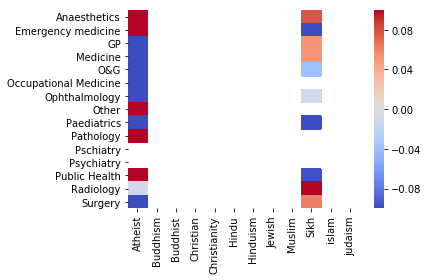

# now ready to do multiple chisquared for all columns and rows
# i.e. 14 rows and 9 columns if no dropna

In [34]:
#THIS

try:

    list_all_religions = [i for i in list(df.columns) if i not in exclude]
    
except NameError:
    list_all_religions = [i for i in list(df.columns)]

In [35]:
#THIS

for religion in list_all_religions:  # cycle through all religious affiliations
    print('\n\nReligion: ', religion)
    
    

    df['Other Religion'] = df[[i for i in list_all_religions if i not in [religion]]].sum(axis='columns')



    
    chi, p_value, dof, exp = chi2_contingency(df[[religion, 'Other Religion']])
    


    if p_value < (0.005/2*(df.shape[0]+df.shape[1])):  # bonferroni for all specialties and religions

        print(religion, ' vs other: chi-sq of all specialties is significant with correction for multiple comparisons.')
        print('chi_sq = ', chi)
        print('p value = ', p_value)
        print('dof = ', dof)
        print('expected: ', exp)


        



Religion:  Atheism
Atheism  vs other: chi-sq of all specialties is significant with correction for multiple comparisons.
chi_sq =  423.28563515447297
p value =  2.6771447184652255e-82
dof =  13
expected:  [[1.12703668e+03 2.63996332e+03]
 [3.14744515e+02 7.37255485e+02]
 [6.49384953e+03 1.52111505e+04]
 [2.41413830e+03 5.65486170e+03]
 [5.03830574e+02 1.18016943e+03]
 [6.19316679e+01 1.45068332e+02]
 [2.47427485e+02 5.79572515e+02]
 [7.42581642e+02 1.73941836e+03]
 [2.92604692e+02 6.85395308e+02]
 [8.85592933e+02 2.07440707e+03]
 [1.05612941e+02 2.47387059e+02]
 [5.75635406e+02 1.34836459e+03]
 [1.56684128e+03 3.67015872e+03]
 [1.01723513e+01 2.38276487e+01]]


Religion:  buddhist
buddhist  vs other: chi-sq of all specialties is significant with correction for multiple comparisons.
chi_sq =  86.08277720325925
p value =  7.803617669879033e-13
dof =  13
expected:  [[4.43703660e+01 3.72262963e+03]
 [1.23911933e+01 1.03960881e+03]
 [2.55656702e+02 2.14493433e+04]
 [9.50423370e+01 7.97395

### using all the GMC data, all religions are chi2 significant. same for HEE. if excluding the unknown and prefer not to say, same results except Sikhism and Hinduism no longer significant on HEE only. 

In [159]:
df

,Atheism,buddhist,christian,hindu,muslim,jewish,sikh,Other Religion
anaesthesia,1278,45,1537,486,197,31,25,3574
Emergency Medicine,369,10,449,96,102,11,7,1037
GP,5225,174,7632,1364,1789,175,282,16359
Medicine,2116,141,3350,845,856,121,58,7429
Obs&gyne,334,19,806,292,190,12,11,1653
occupational medicine,68,0,120,9,8,2,0,207
opthalmology,181,14,404,105,100,9,8,813
paediatrics,585,38,1120,446,204,35,9,2428
pathology,314,21,403,120,87,16,7,961
psychiatry,936,51,1074,426,301,56,37,2844


## now for chi2/fisher for each cell (9*14):

# update bonferroni correction: x 4:


# p = 
0.05/((8*13)*4)

# make into exp_df and then diff_df: UNCOMMENT exp_df_GMC two cells below

In [38]:
# THIS
# initialise
exp_df_GMC = pd.DataFrame().reindex_like(df)
exp_df_GMC.drop(columns='Other Religion', inplace=True)


exp_df_HEE = pd.DataFrame().reindex_like(df)
exp_df_HEE.drop(columns='Other Religion', inplace=True)

In [39]:
# THIS
# COMMENT OUT EITHER #1 or #2

# the below has been validated by hand for muslim/medicine and anaesthetist/Atheist...
# ...in terms of 2 x 2 contingency table formulation.


for religion in list_all_religions:  # cycle through all religious affiliations
    print('\n\nReligion: ', religion)
    
    for specialty in df.index:
        analysis_df = pd.DataFrame()
        analysis_df[religion] = df[religion]
        analysis_df['Other Religion'] = df[[i for i in list_all_religions if i not in [religion]]].sum(axis='columns')
        analysis_df.loc['Other Specialty']  = df.loc[[i for i in df.index if i not in [specialty]]].sum(axis='rows')
        
        temp_df = df.drop(columns=[religion, 'Other Religion'], index=specialty)
        analysis_df.loc['Other Specialty', 'Other Religion'] = temp_df.sum().sum()

        chi, p_value, dof, exp = chi2_contingency(analysis_df.loc[[specialty,'Other Specialty']]
                                                    )
    
        # all GMC
#         exp_df.loc[specialty, religion] = (round(exp[0][0]))
    
        bonferroni = 2*(df.drop(columns='Other Religion').shape[0]*df.drop(columns='Other Religion').shape[1])
        if p_value < (0.005/bonferroni):  # bonferroni for all specialties and religions multiplied

            # populate only statistically significant
            
            #1:
            exp_df_GMC.loc[specialty, religion] = (round(exp[0][0]))
            
            #2
#             exp_df_HEE.loc[specialty, religion] = (round(exp[0][0]))



#             exp_df.loc[specialty, religion] = exp_df.loc[specialty, religion] +r'*'
            
            
            print(religion, specialty, ' vs other: 2x2 chi-sq significant with correction for multiple comparisons.')
#             print('chi_sq = ', chi)
            print('p value = ', round(p_value,2))
            print('dof = ', dof)
            print('expected: ', exp[0][0])

            if exp[0][0] <5:
                print()
                print()
                print('noooooooooooooooooooooooooooooooooooooooooooooooo!')
                print(religion, specialty)



Religion:  Atheism
Atheism anaesthesia  vs other: 2x2 chi-sq significant with correction for multiple comparisons.
p value =  0.0
dof =  1
expected:  1127.0366816825601
Atheism GP  vs other: 2x2 chi-sq significant with correction for multiple comparisons.
p value =  0.0
dof =  1
expected:  6493.849529046978
Atheism Obs&gyne  vs other: 2x2 chi-sq significant with correction for multiple comparisons.
p value =  0.0
dof =  1
expected:  503.8305739191482
Atheism opthalmology  vs other: 2x2 chi-sq significant with correction for multiple comparisons.
p value =  0.0
dof =  1
expected:  247.42748493535365
Atheism paediatrics  vs other: 2x2 chi-sq significant with correction for multiple comparisons.
p value =  0.0
dof =  1
expected:  742.5816416076757
Atheism surgery  vs other: 2x2 chi-sq significant with correction for multiple comparisons.
p value =  0.0
dof =  1
expected:  1566.8412800561634


Religion:  buddhist
buddhist GP  vs other: 2x2 chi-sq significant with correction for multiple 

In [40]:
# exp_df_GMC  # exp _df 2 x 2 chi 2 GMC

In [41]:
bonferroni

196

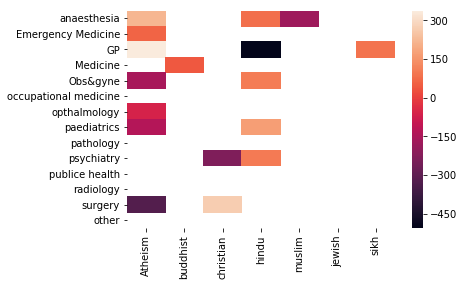

In [18]:
# GMC all

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.drop(columns='Other Religion') - exp_df_GMC)
plt.show()

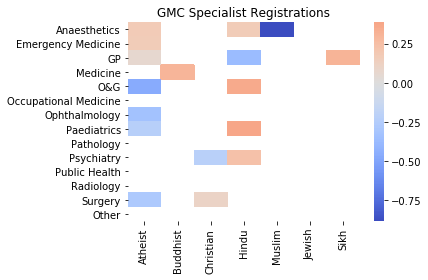

In [19]:
# GMC only statistically significant

import seaborn as sns
import matplotlib.pyplot as plt

normalise_index_names={'anaesthesia': "Anaesthetics", 'Obs&gyne': "O&G", "paediatrics":"Paediatrics",
                        'psychiatry': "Psychiatry", 
                       "surgery": "Surgery", 
                      'occupational medicine': 'Occupational Medicine',
                      'opthalmology': 'Ophthalmology',
                      'pathology': "Pathology",
                      'publice health': 'Public Health',
                      'radiology': 'Radiology',
                      'other': 'Other',
                      }

norm_cols = {'Atheism': 'Atheist',
             'buddhist': 'Buddhist',
             'christian': 'Christian',
             'hindu': 'Hindu',
             'muslim': 'Muslim',
             'jewish': 'Jewish',
             'sikh': 'Sikh',
            }
    

exp_df_GMC.rename(index=normalise_index_names, columns=norm_cols, inplace=True)
df.rename(index=normalise_index_names, columns=norm_cols, inplace=True)


## define diff_df
diff_df = df.drop(columns='Other Religion') - exp_df_GMC
normalised_diff_df = diff_df/df.drop(columns='Other Religion')

sns.heatmap(normalised_diff_df, cmap='coolwarm', center=0)

plt.title('GMC Specialist Registrations')
plt.tight_layout()
# plt.savefig(r'D:\Ali USB Backup\Special\GMC_significant_normalised_alpha_0.005_title.jpg', format='jpg', dpi=1000)
plt.show()

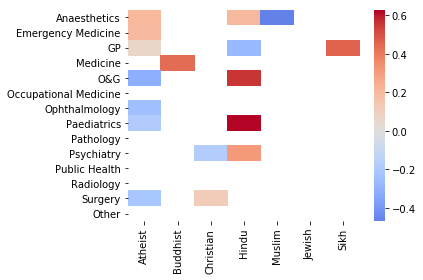

In [20]:
# GMC only statistically significant: normalise wrt expected

import seaborn as sns
import matplotlib.pyplot as plt

normalise_index_names={'anaesthesia': "Anaesthetics", 'Obs&gyne': "O&G", "paediatrics":"Paediatrics",
                        'psychiatry': "Psychiatry", 
                       "surgery": "Surgery", 
                      'occupational medicine': 'Occupational Medicine',
                      'opthalmology': 'Ophthalmology',
                      'pathology': "Pathology",
                      'public health': 'Public Health',
                      'radiology': 'Radiology',
                      'other': 'Other',
                      }

norm_cols = {'Atheism': 'Atheist',
             'buddhist': 'Buddhist',
             'christian': 'Christian',
             'hindu': 'Hindu',
             'muslim': 'Muslim',
             'jewish': 'Jewish',
             'sikh': 'Sikh',
            }
    

exp_df_GMC.rename(index=normalise_index_names, columns=norm_cols, inplace=True)
df.rename(index=normalise_index_names, columns=norm_cols, inplace=True)


## define diff_df
diff_df = df.drop(columns='Other Religion') - exp_df_GMC
normalised_diff_df = diff_df/exp_df_GMC

sns.heatmap(normalised_diff_df, cmap='coolwarm', center=0)

# plt.title('GMC Specialist Registrations')
plt.tight_layout()
plt.savefig(r'D:\Ali USB Backup\Special\GMC_significant_normalised_alpha_0.005.jpg', format='jpg', dpi=1000)
plt.show()

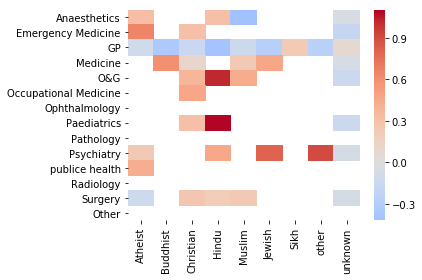

In [20]:
# GMC only statistically significant: normalise wrt expected - ALL DATA

import seaborn as sns
import matplotlib.pyplot as plt

normalise_index_names={'anaesthesia': "Anaesthetics", 'Obs&gyne': "O&G", "paediatrics":"Paediatrics",
                        'psychiatry': "Psychiatry", 
                       "surgery": "Surgery", 
                      'occupational medicine': 'Occupational Medicine',
                      'opthalmology': 'Ophthalmology',
                      'pathology': "Pathology",
                      'public health': 'Public Health',
                      'radiology': 'Radiology',
                      'other': 'Other',
                      }

norm_cols = {'Atheism': 'Atheist',
             'buddhist': 'Buddhist',
             'christian': 'Christian',
             'hindu': 'Hindu',
             'muslim': 'Muslim',
             'jewish': 'Jewish',
             'sikh': 'Sikh',
            }
    

exp_df_GMC.rename(index=normalise_index_names, columns=norm_cols, inplace=True)
exp_df_GMC.rename(columns={'unknown and prefer not to say':'unknown'}, inplace=True)
df.rename(index=normalise_index_names, columns=norm_cols, inplace=True)
df.rename(columns={'unknown and prefer not to say':'unknown'}, inplace=True)


## define diff_df
diff_df = df.drop(columns='Other Religion') - exp_df_GMC
normalised_diff_df = diff_df/exp_df_GMC

sns.heatmap(normalised_diff_df, cmap='coolwarm', center=0)

# plt.title('GMC Specialist Registrations')
plt.tight_layout()
plt.savefig(r'D:\Ali USB Backup\Special\ALLDATA_GMC_significant_normalised_alpha_0.005.jpg', format='jpg', dpi=1000)
plt.show()

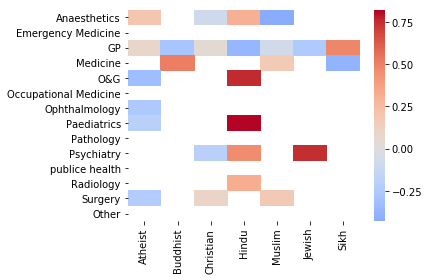

In [36]:
# GMC only statistically significant: normalise wrt expected
# GMC exclusions, after imputation OPTION 3

import seaborn as sns
import matplotlib.pyplot as plt

normalise_index_names={'anaesthesia': "Anaesthetics", 'Obs&gyne': "O&G", "paediatrics":"Paediatrics",
                        'psychiatry': "Psychiatry", 
                       "surgery": "Surgery", 
                      'occupational medicine': 'Occupational Medicine',
                      'opthalmology': 'Ophthalmology',
                      'pathology': "Pathology",
                      'public health': 'Public Health',
                      'radiology': 'Radiology',
                      'other': 'Other',
                      }

norm_cols = {'Atheism': 'Atheist',
             'buddhist': 'Buddhist',
             'christian': 'Christian',
             'hindu': 'Hindu',
             'muslim': 'Muslim',
             'jewish': 'Jewish',
             'sikh': 'Sikh',
            }
    

exp_df_GMC.rename(index=normalise_index_names, columns=norm_cols, inplace=True)
df.rename(index=normalise_index_names, columns=norm_cols, inplace=True)


## define diff_df
diff_df = df.drop(columns='Other Religion') - exp_df_GMC
normalised_diff_df = diff_df/exp_df_GMC

sns.heatmap(normalised_diff_df, cmap='coolwarm', center=0)

# plt.title('GMC Specialist Registrations')
plt.tight_layout()
plt.savefig(r'D:\Ali USB Backup\Special\GMC_imputed_exclusions.jpg', format='jpg', dpi=1000)
plt.show()

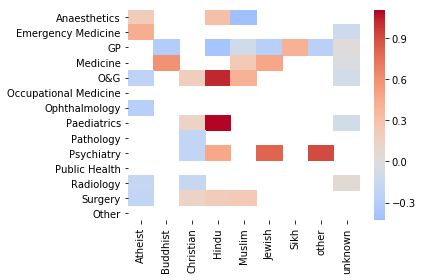

In [44]:
# GMC only statistically significant: normalise wrt expected
# GMC NO exclusions, after imputation OPTION 3

import seaborn as sns
import matplotlib.pyplot as plt

normalise_index_names={'anaesthesia': "Anaesthetics", 'Obs&gyne': "O&G", "paediatrics":"Paediatrics",
                        'psychiatry': "Psychiatry", 
                       "surgery": "Surgery", 
                      'occupational medicine': 'Occupational Medicine',
                      'opthalmology': 'Ophthalmology',
                      'pathology': "Pathology",
                      'public health': 'Public Health',
                       'publice health': 'Public Health',
                      'radiology': 'Radiology',
                      'other': 'Other',
                      }

norm_cols = {'Atheism': 'Atheist',
             'buddhist': 'Buddhist',
             'christian': 'Christian',
             'hindu': 'Hindu',
             'muslim': 'Muslim',
             'jewish': 'Jewish',
             'sikh': 'Sikh',
            }
    

exp_df_GMC.rename(index=normalise_index_names, columns=norm_cols, inplace=True)
df.rename(index=normalise_index_names, columns=norm_cols, inplace=True)


## define diff_df
diff_df = df.drop(columns='Other Religion') - exp_df_GMC
normalised_diff_df = diff_df/exp_df_GMC

normalised_diff_df.rename(columns={'unknown and prefer not to say':'unknown'}, inplace=True)
sns.heatmap(normalised_diff_df, cmap='coolwarm', center=0)

# plt.title('GMC Specialist Registrations')
plt.tight_layout()
plt.savefig(r'D:\Ali USB Backup\Special\GMC_imputed_NOexclusions.jpg', format='jpg', dpi=1000)
plt.show()

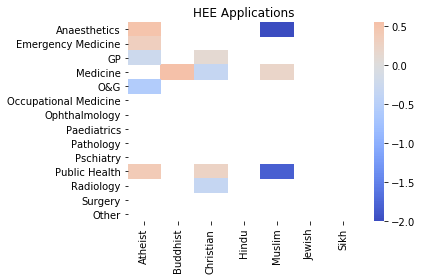

In [50]:
# HEE only statistically significant

import seaborn as sns
import matplotlib.pyplot as plt


normalise_index_names={'Emergency medicine': "Emergency Medicine",
                        'psychiatry': "Psychiatry", 
                      'occupational medicine': 'Occupational Medicine',
                      'opthalmology': 'Ophthalmology',
                      'pathology': "Pathology",
                      'public health': 'Public Health',
                      'radiology': 'Radiology',
                      'other': 'Other',
                      }

norm_cols = {'Atheism': 'Atheist',
             'Buddhism': 'Buddhist',
             'Christianity': 'Christian',
             'Hinduism': 'Hindu',
#              'Islam': 'Muslim',
             'islam': 'Muslim',
             'judaism': 'Jewish',
             'sikh': 'Sikh',
            }


exp_df_HEE.rename(index=normalise_index_names, columns=norm_cols, inplace=True)
df.rename(index=normalise_index_names, columns=norm_cols, inplace=True)

# define diff_df
diff_df = df.drop(columns='Other Religion') - exp_df_HEE
normalised_diff_df = diff_df/df.drop(columns='Other Religion')

# plot:
sns.heatmap(normalised_diff_df, cmap='coolwarm', center=0)  # coolwarm, RdGy_r

plt.title('HEE Applications')
plt.tight_layout()
plt.savefig(r'D:\Ali USB Backup\Special\HEE_significant_normalised_alpha_0.005_title.jpg', format='jpg', dpi=1000)
plt.show()

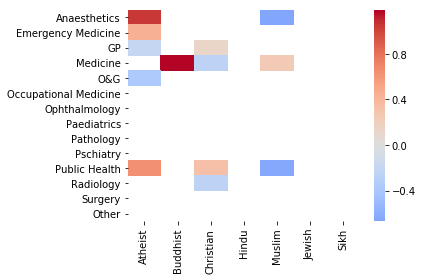

In [19]:
# HEE only statistically significant - divide by expected

import seaborn as sns
import matplotlib.pyplot as plt


normalise_index_names={'Emergency medicine': "Emergency Medicine",
                        'psychiatry': "Psychiatry", 
                      'occupational medicine': 'Occupational Medicine',
                      'opthalmology': 'Ophthalmology',
                      'pathology': "Pathology",
                      'public health': 'Public Health',
                      'radiology': 'Radiology',
                      'other': 'Other',
                      }

norm_cols = {'Atheism': 'Atheist',
             'Buddhism': 'Buddhist',
             'Christianity': 'Christian',
             'Hinduism': 'Hindu',
#              'Islam': 'Muslim',
             'islam': 'Muslim',
             'judaism': 'Jewish',
             'sikh': 'Sikh',
            }


exp_df_HEE.rename(index=normalise_index_names, columns=norm_cols, inplace=True)
df.rename(index=normalise_index_names, columns=norm_cols, inplace=True)

# define diff_df
diff_df = df.drop(columns='Other Religion') - exp_df_HEE
normalised_diff_df = diff_df/exp_df_HEE

# plot:
sns.heatmap(normalised_diff_df, cmap='coolwarm', center=0)  # coolwarm, RdGy_r

# plt.title('HEE Applications')
plt.tight_layout()
plt.savefig(r'D:\Ali USB Backup\Special\HEE_significant_normalised_alpha_0.005.jpg', format='jpg', dpi=1000)
plt.show()

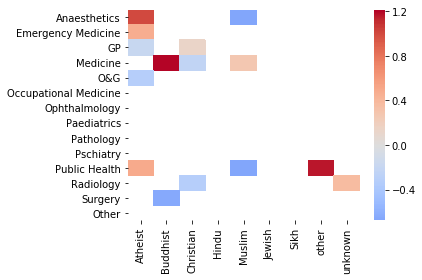

In [29]:
# HEE only statistically significant - divide by expected - ALL DATA NO EXLUSONS

import seaborn as sns
import matplotlib.pyplot as plt


normalise_index_names={'Emergency medicine': "Emergency Medicine",
                        'psychiatry': "Psychiatry", 
                      'occupational medicine': 'Occupational Medicine',
                      'opthalmology': 'Ophthalmology',
                      'pathology': "Pathology",
                      'public health': 'Public Health',
                      'radiology': 'Radiology',
                      'other': 'Other',
                      }

norm_cols = {'Atheism': 'Atheist',
             'Buddhism': 'Buddhist',
             'Christianity': 'Christian',
             'Hinduism': 'Hindu',
#              'Islam': 'Muslim',
             'islam': 'Muslim',
             'judaism': 'Jewish',
             'sikh': 'Sikh',
            }


exp_df_HEE.rename(index=normalise_index_names, columns=norm_cols, inplace=True)
df.rename(index=normalise_index_names, columns=norm_cols, inplace=True)

# define diff_df
diff_df = df.drop(columns='Other Religion') - exp_df_HEE
normalised_diff_df = diff_df/exp_df_HEE

# plot:
sns.heatmap(normalised_diff_df, cmap='coolwarm', center=0)  # coolwarm, RdGy_r

# plt.title('HEE Applications')
plt.tight_layout()
plt.savefig(r'D:\Ali USB Backup\Special\ALLDATA_HEE_significant_normalised_alpha_0.005.jpg', format='jpg', dpi=1000)
plt.show()

# GMC - HEE : if when multiplied = negative 
# this looks at over or under represented if the reverse is true in applications

In [42]:
df_inference = pd.DataFrame().reindex_like(exp_df_GMC)

for i in range(len(df_inference.index)):
    for j in range(len(df_inference.columns)):
        
        if exp_df_GMC.iloc[i,j] * exp_df_HEE.iloc[i,j] < 0:
            df_inference.iloc[i,j] = exp_df_GMC.iloc[i,j] - exp_df_HEE.iloc[i,j]
            
df_inference

,Atheism,buddhist,christian,hindu,muslim,jewish,sikh
anaesthesia,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Emergency Medicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GP,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Obs&gyne,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupational medicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN
opthalmology,NaN,NaN,NaN,NaN,NaN,NaN,NaN
paediatrics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pathology,NaN,NaN,NaN,NaN,NaN,NaN,NaN
psychiatry,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Cramer's V or Theil's U

In [ ]:
%who

In [18]:
df.drop(columns='Other Religion', inplace=True)
df

,Atheism,Buddhism,Christianity,Hinduism,islam,judaism,sikh
Anaesthetics,307,12,239,71,70,6,9
Emergency medicine,300,24,283,103,259,6,10
GP,902,149,2060,533,1579,17,65
Medicine,464,177,635,226,899,20,30
O&G,108,24,302,93,263,6,9
occupational medicine,2,0,12,2,3,1,0
opthalmology,49,9,95,21,81,3,3
Paediatrics,155,19,316,76,266,6,4
pathology,33,2,52,13,31,2,0
Pschiatry,133,17,166,39,101,0,6


In [19]:

def make_df_datamatrix(df, i = 'Anaesthetics', j = 'Atheist'):
    total_no_ppl = df.sum().sum()
    df_datamatrix = pd.DataFrame(index=range(0, total_no_ppl), columns=['Specialty', 'Religion'])

    start_row = 0
    no_rows = (df.loc[i, j]) -1
    if no_rows < 1: 
        pass

    else:
        df_datamatrix.loc[start_row : no_rows, ['Specialty', 'Religion']] = i, j
    # start_row = start_row + no_rows

    return df_datamatrix.loc[df_datamatrix.Specialty.notnull()]

In [20]:
# dm1 =  make_df_datamatrix(df, i = 'Anaesthetics', j = 'Atheist')
# dm2 =  make_df_datamatrix(df, i = 'Anaesthetics', j = 'Buddhist')
# DM = dm1.append(dm2)

# dm3 =  make_df_datamatrix(df, i = 'Anaesthetics', j = df.columns[2])  #
# DM = dm1.append([dm2, dm3])

In [21]:
def iterate_make_df(df):
    for i in df.index:
        for j in df.columns:
            dm =  make_df_datamatrix(df, i=i, j=j)  #
            try:
                DM = DM.append(dm, ignore_index=True)
            except UnboundLocalError:
                DM = dm
    return DM

In [22]:
# del(DM)
DM = iterate_make_df(df)
DM.head()

,Specialty,Religion
0,Anaesthetics,Atheism
1,Anaesthetics,Atheism
2,Anaesthetics,Atheism
3,Anaesthetics,Atheism
4,Anaesthetics,Atheism


In [23]:
DM = pd.get_dummies(DM)

In [24]:
DM.head()

,Specialty_Anaesthetics,Specialty_Emergency medicine,Specialty_GP,Specialty_Medicine,Specialty_O&G,Specialty_Paediatrics,Specialty_Pschiatry,Specialty_Surgery,Specialty_occupational medicine,Specialty_opthalmology,...,Specialty_pathology,Specialty_public health,Specialty_radiology,Religion_Atheism,Religion_Buddhism,Religion_Christianity,Religion_Hinduism,Religion_islam,Religion_judaism,Religion_sikh
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [25]:
import sys
sys.path.insert(0, r"C:\Users\ali_m\AnacondaProjects\PhD\Epilepsy_Surgery_Project")
from crosstab.Semiology_Crosstab.Semiology_Crosstab_exclude_files_with_outcome_8 import*
from crosstab.Semiology_Crosstab.main_dataframe import*
from crosstab.Semiology_Crosstab.populate_main_dataframe import*
from crosstab.outcomes import*
from Stats.performance_metrics import *
from Stats.model_performance import *
from Sklearn_and_plots.plot_coefficients_all import plot_coefficients_all


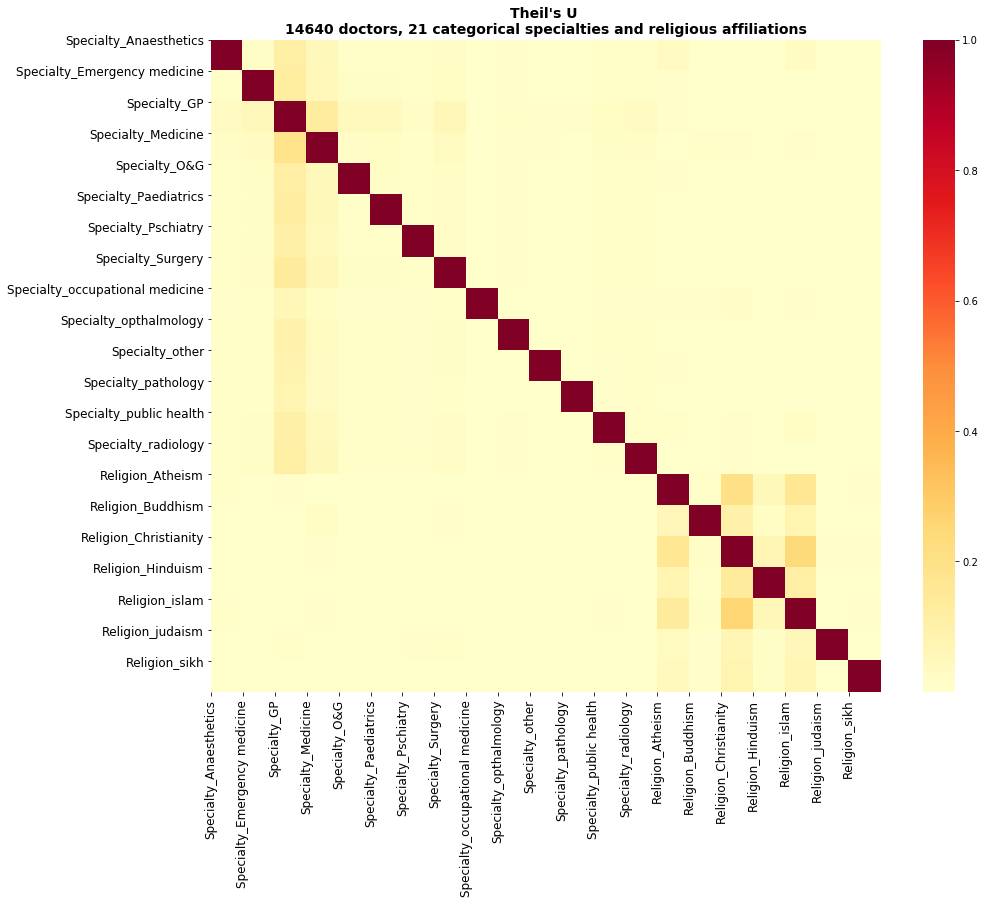

In [27]:



# # rearrange columns
# X_HS_model = X_HS_model[[c for c in X_HS_model if c not in ['EZ', 'Hippocampal Sclerosis', 'SVC SoS', 'SVC SoS+HS', 'GB SoS', 'GB SoS+HS']] + ['Hippocampal Sclerosis', 'SVC SoS', 'SVC SoS+HS', 'GB SoS', 'GB SoS+HS', 'EZ']]


# plot
corr_GMC_exclude = associations(DM, 
                          nominal_columns='all', mark_columns=False, Theils_U=True, plot=True,
                          return_results = True, 
                          savefigure=True, path_name='D:\\Ali USB Backup\\Special\\Mo Jo Theils U HEE exclude.jpg',
                          title_auto=False, #cmap='coolwarm',
                       figsize=(15, 12),
                               )


UnboundLocalError: local variable 'title' referenced before assignment

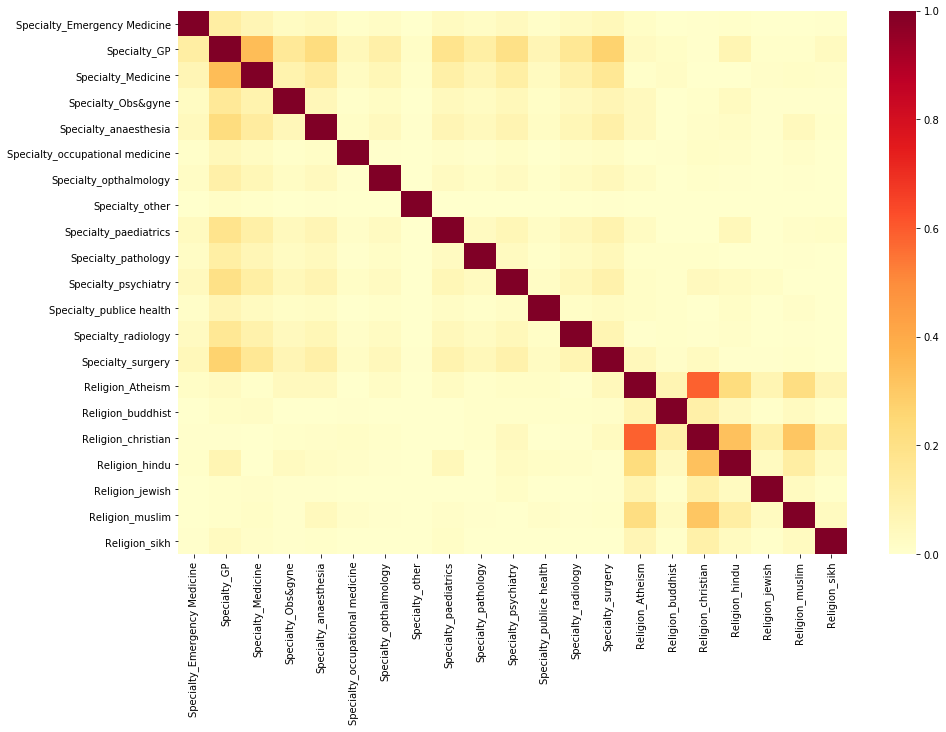

In [23]:
corr_GMC_exclude = associations(DM, 
                          nominal_columns='all', mark_columns=False, Theils_U=False, plot=True,
                          return_results = True, 
                          savefigure=False, #path_name = 'D:\\Ali USB Backup\\Special\\Mo Jo Cramers V GMC exclude.jpg',
                          title_auto=False, 
                       figsize=(15, 10),
                               )

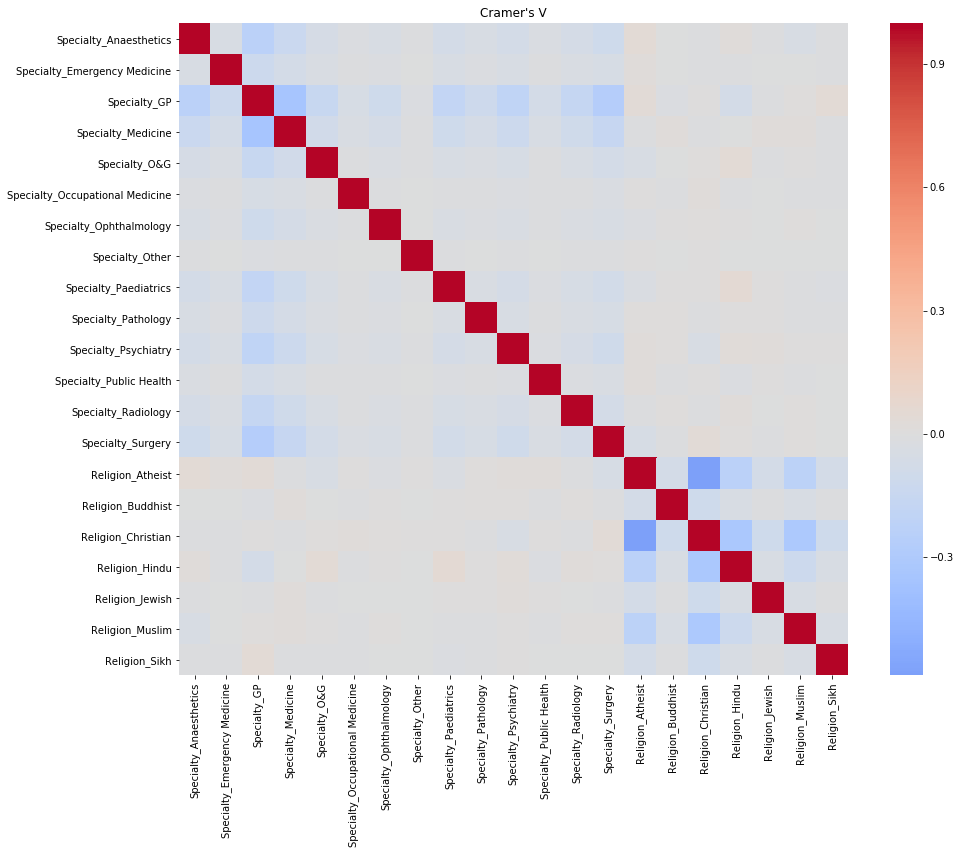

In [58]:
plt.figure(figsize=(15,12))
plt.title('Cramer\'s V')
sns.heatmap(DM.corr('pearson'), cmap='coolwarm', center=0)